<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# 인공 신경망을 구성하는 절차
# 1. dummy data 준비 - for training
# 2. 훈련용, 검증용, test용으로 나누기
# 3. layer 만들기(dense)
# 4. model에 적용(Sequentional)
# 5. compile 진행 (최적화 기법을 써서; 주로 adam)
# 6. 훈련(fit)후 검증(evaluate)

In [50]:
# 손실곡선 : fit() 로 model을 훈련하는 동안 훈련과정이 상세하게 출력되어 확인할 수 있다(epoch 횟수, 손실, 정확도)
# <keras.src.callbacks.history.History at 0x77fd7ed9a860> - fit() 하면 마지막에 나오는 것
# colab의 codeshall은 print()명령어를 쓰지 않아도 마지막 line의 실행 결과를 자동 출력함

# 즉, fit() 는 History라는 class객체를 반환한다(훈련 과정의 지표, 손실, 정확도 등을 내장)
# 이 값을 잘 활용하면 graph를 그릴 수 있다

In [51]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
# \ -> python에서 enter 효과 제거해서 한 줄로 표시(java에서 ; 없는 것과 똑같이)

train_scaled, val_scaled, train_target, val_target = train_test_split((train_input / 255.0), train_target, test_size=0.2, random_state=42)

In [52]:
print(test_input.shape, test_target.shape)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(10000, 28, 28) (10000,)
(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [53]:
# model을 만드는 간단한 함수 정의
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))

  # model_fn()에 a_layer로 추가한 keras층이 있으면 은닉층 뒤에 하나의 층 추가 - 현재로써는 하나밖에 추가 불가능
  if a_layer: model.add(a_layer)

  model.add(keras.layers.Dense(10, activation='softmax'))

  return model

In [54]:
# model_fn() 호출 시험
model = model_fn()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # loss= 다중분류, metrics=정확도
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# verbose: 훈련과정 출력을 조절하는 과정
# verbose=0 -> 훈련과정을 나타내지 않는다
# verbose=1 -> 기본값, epoch마다 진행, 진행막대와 함께 손실등의 지표가 출력된다
# verbose=2 -> 진행막대 빼고 출력

In [56]:
print(history.history.keys())# 훈련 측정 값이 담계있는 dictiorary형태의 history
# 정확도와 손실 값이 있다
# 정확도는 compile() 의 metrics 매개 변수에 accuracy를 추가했기 때문에 history 속성에 포함되어 있다

dict_keys(['accuracy', 'loss'])


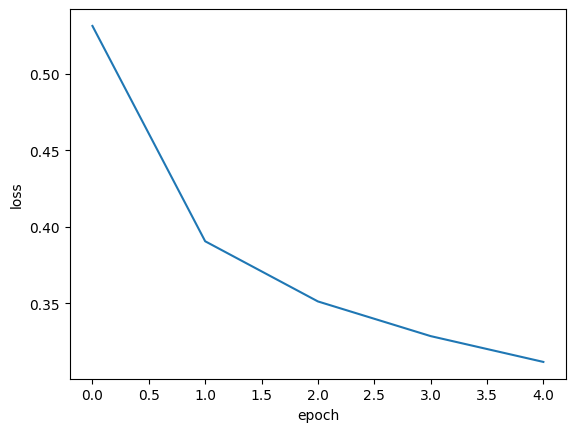

In [57]:
import matplotlib.pyplot as plt
# history 속서에 포함된 손실과 정확도는 epoch마다 계산한 값이 순서대로 나열된 단순한 list로 matplotlib으로 쉽게 그래프 처리가 가능하다
plt.plot(history.history['loss']) # 손실
plt.xlabel('epoch') # python index는 0부터 시작해서 5개의 epoch가 0 ~ 4 까지 x축에 표현
plt.ylabel('loss')
plt.show()

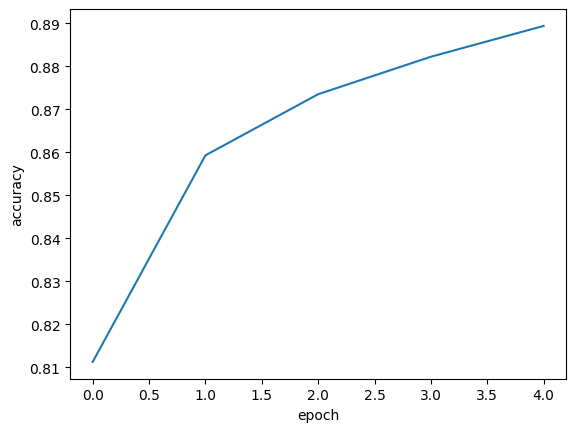

In [58]:
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [61]:
# epoch 횟수를 20번까지 늘려보자
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # loss= 다중분류, metrics=정확도
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

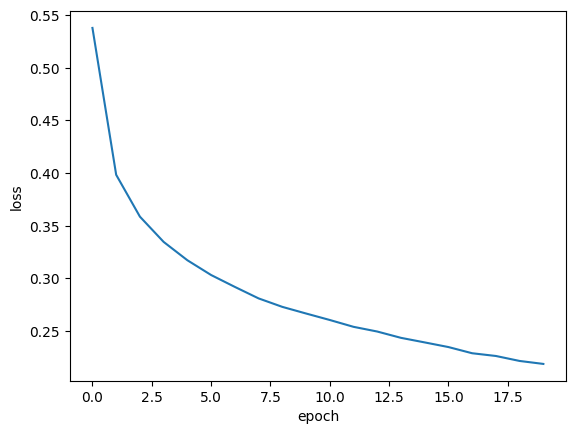

In [62]:
plt.plot(history.history['loss']) # 손실
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

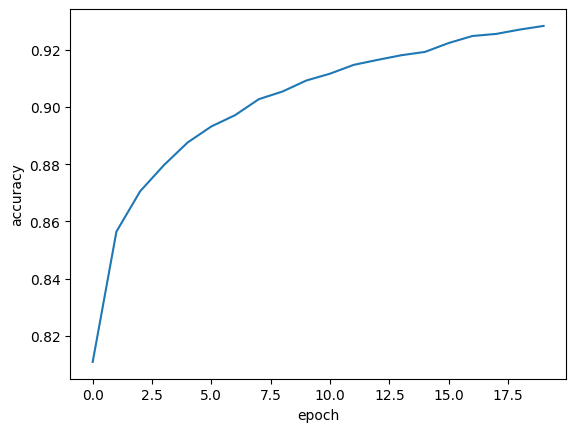

In [63]:
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

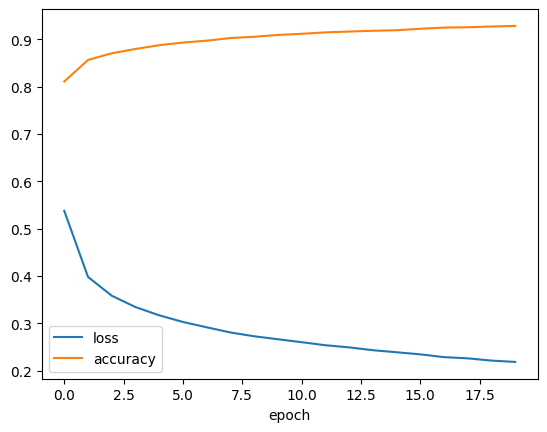

In [65]:
plt.plot(history.history['loss']) # 손실
plt.plot(history.history['accuracy']) # 정확도
plt.xlabel('epoch')
plt.legend(['loss','accuracy'])
plt.show()

In [66]:
# 검증 손실
# 예전에 확률적 경사 하강법을 사용했을 때 과대/과소 적합과 epoch 사이에 관계 부분이 있었다
# 인공 신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다

# epoch에 따른 과대 적합, 과소 적합을 파악하려면 훈련 세트 점수와 검증 세트에 대한 점수도 필요하다
# 그래서 훈련set에 손실과 정확도만 그리면 파악이 어렵다
# 검증 손실을 이용해서 과대/과소 적합을 응용하자

# keypoint
# 손실을 사용하는 것과 정확도를 사용하는 것의 차이는?
# 인공 신경망 model이 최적화하는 대상은 정확도가 아니라 손실함수
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있는데
# deep learning에서 model이 잘 훈련되었는지 판단하려면 정확도보다는 손실함수의 값을 확인하는 것이 더 좋은 방법이다

In [67]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7608 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9003 - loss: 0.2868 -

In [69]:
print(history.history.keys())
# 4개의 key - 훈련 정확도, 훈련 손실, 검증 정확도, 검증 손실

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


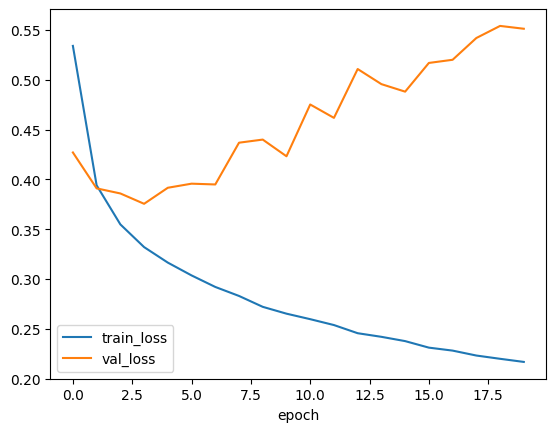

In [74]:
plt.plot(history.history['loss']) # 훈련손실
plt.plot(history.history['val_loss']) # 검증손실
# plt.plot(history.history['val_accuracy']) # 검증정확도
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
# plt.legend(['train_loss','val_loss','val_accuracy'])
plt.show()

# 훈련, 검증의 손실 차이가 너무 크면 사용 X
# 결과 분석: 초기에 검증손실이 감소하다가 5번째 epoch에서 다시 상승
# 훈련 손실은 꾸준히 감소하기 때문에 과대 적합 model이 생성되었다
# 검증 손실이 상승하는 시점을 가능한한 늦추면 set에 대한 손실이 줄어들고 검증 set에 대한 정확도가 증가할 것이다

# 과대적합을 막기 위한 방법으로 예전에 사용했던 규제 방식 대신에 신경망에 특화된 규제 방법(drop-out)을 사용해보자

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


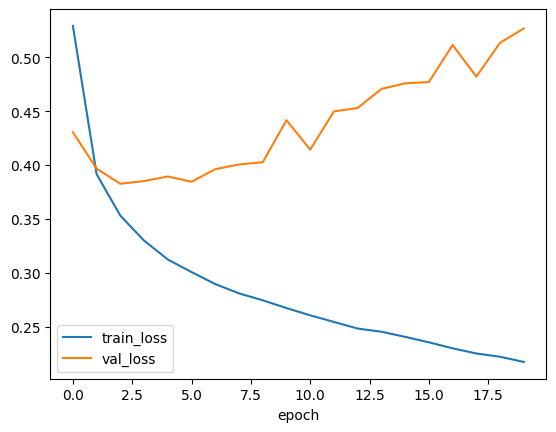

In [75]:
# 먼wj Optimizer hyperparameter를 조절하여 과대 적합을 완화시켜보자
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='RMSprop')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss']) # 훈련손실
plt.plot(history.history['val_loss']) # 검증손실
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

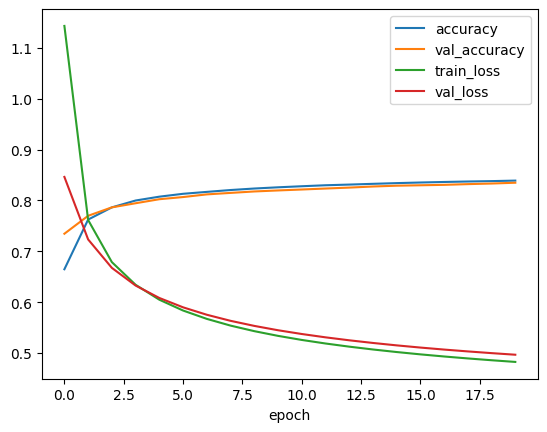

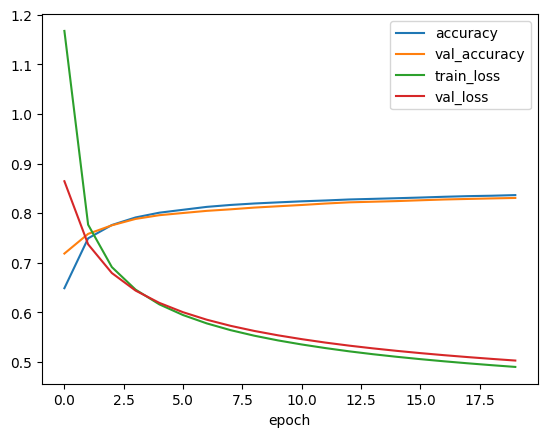

In [82]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adagrad')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['accuracy']) # 훈련정확도
plt.plot(history.history['val_accuracy']) # 검증정확도
plt.plot(history.history['loss']) # 훈련손실
plt.plot(history.history['val_loss']) # 검증손실
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy','train_loss','val_loss'])
plt.show()

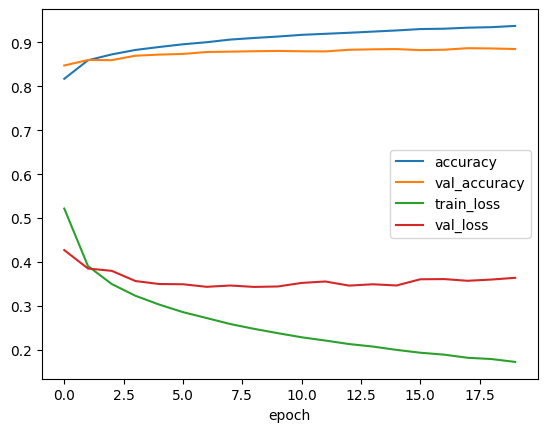

In [84]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['accuracy']) # 훈련정확도
plt.plot(history.history['val_accuracy']) # 검증정확도
plt.plot(history.history['loss']) # 훈련손실
plt.plot(history.history['val_loss']) # 검증손실
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy','train_loss','val_loss'])
plt.show()

In [86]:
# dropout: deep ledarning의 기초가 되는 Jeffery Hinton이 소개
# 훈련과정에서 층이 있는 일부 neuron을 random하게 꺼서 (enuron 출력 0 처리) 과대적합 방지

# 어떤 sample을 처리할 때 은닉 층의 두번째 neuron이 dropout 되서 h2 출력이 없음
# 다른 sample을 처리할 때는 은닉츠의 첫번째 neuron이 dropout 되서 h1 출력이 없음
# neuron은 random하게 dropout 되고 얼마나 많은 neuron을 드롭할지 우리가 hyper pharameter에 정할 것임

# dropout 이 왜 과대 적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 neuron이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있는 것

![image.png](
  
)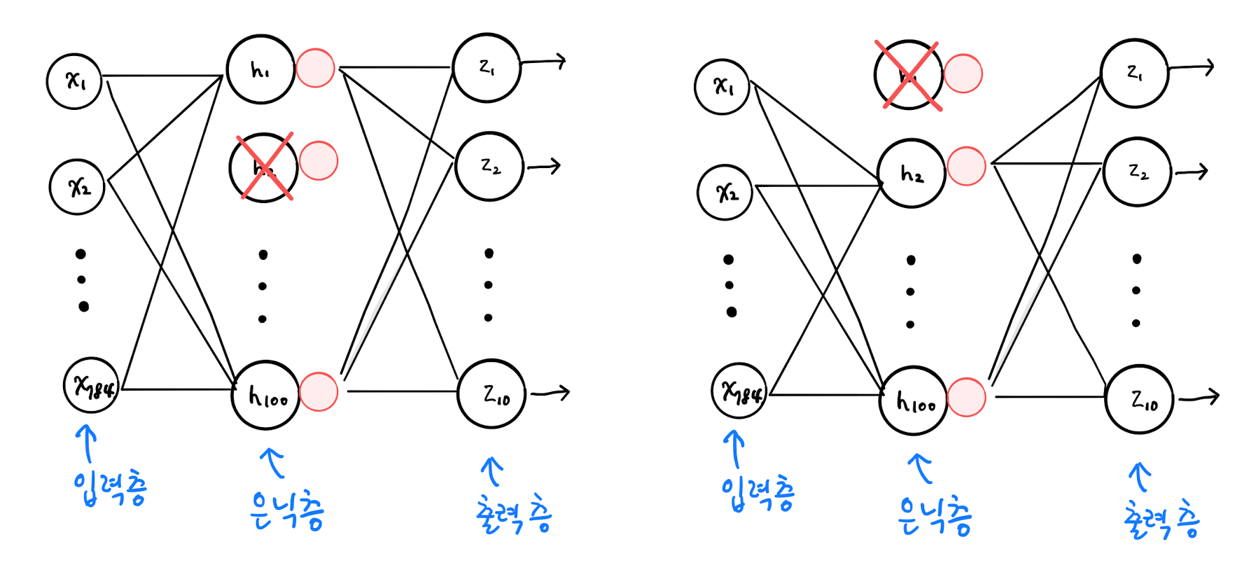

In [93]:
# 또 다른 분석
# 앞에dropout이 적용된 2개의 신경망 그림을 보면 dropout을 적용해 훈련하는 것은 마치 2개의 신경망을 ensemble하는 것처럼 상상하게 된다
# ensemble: 더 좋은 예측을 만들기 위해 여러 개의 model을 훈련하는 machine learning algorism

# keras에서 dropout을 keras.layers.Dropout으로 제공
# 어떤 층의 뒤에 Dropout을 둬서 이 층의 출력을 random하게 0으로 처리
# Dropout이 층처럼 사용되지만 훈련되는 pharameter는 없다

# 이전에 생성한 model_fn에 dropoout 객체를 전달하여 층을 추가한다
model = model_fn(keras.layers.Dropout(0, 3))
model.summary()
# 은닉층 뒤에 추가된 dropout 층(3번째 값)은 훈련되는 model parameter가 없다
# 입력과 출력의 크기가 같다
# 일부 neuron의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지 않는다


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# 주의 사항! 훈련이 끝나고 평가나 예측을 수행할 때는 dropout을 적용하지 않는다! - 훈련된 모든 neuron을 사용해야 올바르게 예측된다
# Tensorflow와 keras는 model을 평가와 예측에 사용할 때 자동으로 dropout을 적용하지 않는다

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) # valiidation_data를 사용함으로써 검증 결과에는 dropout 적용 X

<function matplotlib.pyplot.show(close=None, block=None)>

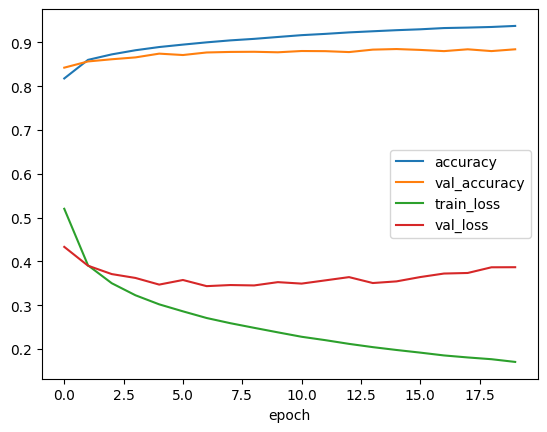

In [95]:
plt.plot(history.history['accuracy']) # 훈련정확도
plt.plot(history.history['val_accuracy']) # 검증정확도
plt.plot(history.history['loss']) # 훈련손실
plt.plot(history.history['val_loss']) # 검증손실
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy','train_loss','val_loss'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

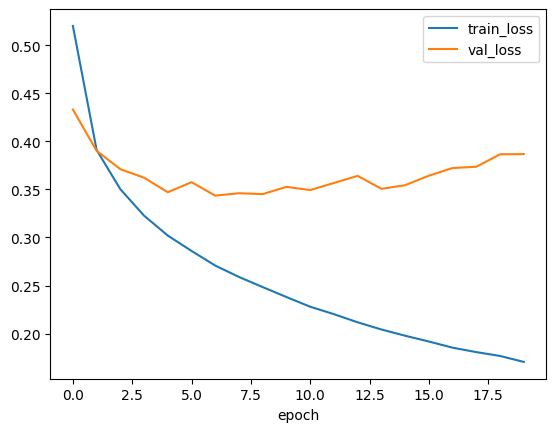

In [96]:

plt.plot(history.history['loss']) # 훈련손실
plt.plot(history.history['val_loss']) # 검증손실
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [98]:
# 차후 재활용을 위해서 model 저장과 복원도 해보자
model = model_fn(keras.layers.Dropout(0, 3))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
model.save('model-whole.keras') # model 저장
# keras model은 훈련된 model의 pharameter를 저장하는 save_weight() 가 있다
# tensorflow의 checkpoint format으로 저장하지만 .h5의 경우 HDF5 format으로 저장한다
# https://www.tensorflow.org/guide/checkpoint?hl=ko - tensorflow의 checkpoint format으로 저장
# https://geunuk.tistory.com/466 - .hp는HDF5 format으로 저장

model.save_weights('model.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
!ls -al model* # 앞에 model로 시작하는 모든 file을 list해서 보여달라

-rw-r--r-- 1 root root 971928 Jan 10 05:53 model.weights.h5
-rw-r--r-- 1 root root 974763 Jan 10 05:49 model-whole.keras


In [106]:
# test 1. 훈련하지 않은 새로운 model을 만들고 model.weights.h5 file에서 훈련된 model pharameter를 읽어서 사용하기

# model_fn() 과 동일한 model
model = model_fn(keras.layers.Dropout(0.3)) # 훈련하지 않은 새로운 model
model.load_weights('model.weights.h5')
model.summary()
# 이 때 사용하는 method는 save_weight()와 쌍을 이루는 load_weight()
# 주의사항: load_weight()를 사용하려면 save_weight()로 저장했던 model과 정확이 같은 구조를 가져야한다

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_24 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# model의 검증 정확도 확인
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# predict()는 sklearn과 다른 sample마다 10개의 class에 대한 확률을 반환한다(다중분류)
# 10개의 확률 중 가장 큰 값의 index를 골라(.argmax) tatget label과 비교하여 정확도 파악
# axis=-1 배열의 마지막 차원을 따라 최대값을 고른다

# fashion mnist dataset에서 덜어낸 검증 set의 sample수는 12,000개이기 때문에
# predict()는 (12000, 10)크기의 배열을 반환
# 검증 set는 2차원 배열이기 때문에 마지막 차원은 1
# ex.)

print(np.mean(val_labels == val_target))

# axis=1이면 열을 따라 각 행의 최댓값의 index선택
# axis=0이면 행을 따라 각 행의 최댓값의 index선택
# 그 다음 line은 argmax()로 고른 index(val_labels)와 target(val_target)을 비교 - 만일 두 배열에서 각 위치의 값이 같아면 1 다르면 0

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.8811666666666667


In [109]:
# model 전체를 file에서 읽은 다음 검증 set의 정확도를 출력해 보기
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target) # 같은 model을 불러들였기 때문에 위와 정확도가 같다

# 현 상태 분석: 20번의 epoch동안 model을 훈련해서 검증점수가 상능하는 지점을 확인
# model을 과대적합되지 않은 epoch만큼 다시 훈련
# 그 model을 2번씩 훈련하지 않고 한번에 끝내는 방법? -> keras callback

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8830 - loss: 0.3376


[0.34055620431900024, 0.8811666369438171]

In [110]:
# test 2. 아예 file로 새로운 model을 만들고 바로 사용해보기(+ callback)
# callback - 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체, keras.callback에 존재
# fit()의 callback 매개변수에 list로 전달해서 사용한다
# 지금 우리가 사용할 callback - modelCheckpoint - epoch마다 model 저장
# save_best_only=True 지정해서 가장 낮은 검증 점수를 만드는 model을 저장할 수 있다

model = model_fn(keras.layers.Dropout(0, 3))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
# model 훈련 뒤 best-model.keras에 최상의 검증 점수를 낸 model이 저장된다

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
model = keras.models.load_model('best-model.keras') # load_model로 저장했던 값을 불러와 다시 예측 실행

model.evaluate(val_scaled, val_target)
# keras.callbacks.ModelCheckpoint callback이 가장 낮은 검증 점수의 model을 자동으로 저장해 주었다
# 여전히 20번의 epoch동안 훈련을 했다
# 사실 검증점수가 상승하기 시작하면 그 이후에는 과대 적합니 더 커지기 때문에 훈련을 계속할 필요가 없다.
# 이때 훈련을 종료하면 자원과 시간을 아낄 수 있다 - 조기종료(early stopping)
# 조기 종료는 deep learning 분야에서 많이 사용하는 기법
# epoch횟수를 제한하는 규제 방법 중 하나지만 model이 과대적합되는 것을 막아주기도 한다

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8734 - loss: 0.3490


[0.3528216481208801, 0.8734166622161865]

In [117]:
# keras는 조기 종료를 위한 EarlyStopping callback 을 제공한다 - patience 매개변수는 검증 점수가 향상되지 않더라도 True라면 epoch 회수로 지정
# patience=2 2번 연속 검증 점수가 향상되자 않으면 훈련을 중지(patience: 인내심)
# restore_best_weights=True -> 가장 낮은 검증 손실을 낸 model pharameter로 돌린다

model = model_fn(keras.layers.Dropout(0, 3))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

# 가장 낮은 검증 손실의 model을 file에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지시킬 수 있다
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# 훈련을 중지하고 현재 model의 pharameter를 최상의 pharameter로 되돌리자
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
print(early_stopping_cb.stopped_epoch)

10


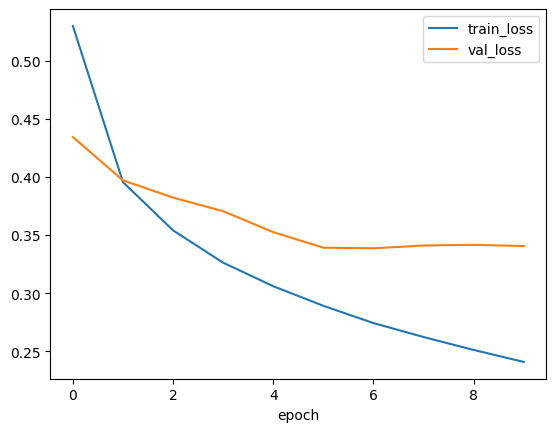

In [123]:
plt.plot(history.history['loss']) # 훈련손실
plt.plot(history.history['val_loss']) # 검증손실
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

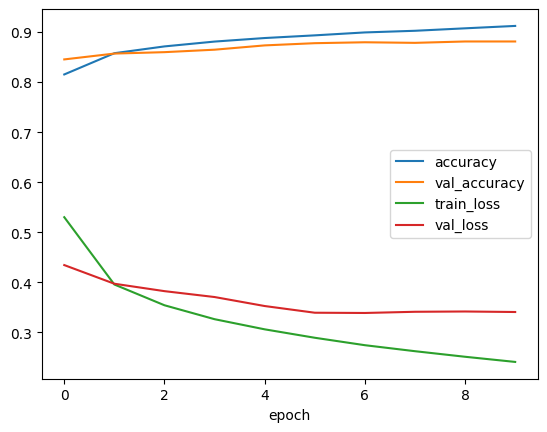

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8826 - loss: 0.3347


[0.33258381485939026, 0.8831666707992554]

In [124]:
plt.plot(history.history['accuracy']) # 훈련정확도
plt.plot(history.history['val_accuracy']) # 검증정확도
plt.plot(history.history['loss']) # 훈련손실
plt.plot(history.history['val_loss']) # 검증손실
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy','train_loss','val_loss'])
plt.show()
model.evaluate(val_scaled,val_target)